<a href="https://colab.research.google.com/github/dev-S-t/Vaidya/blob/main/Load_medicinal_plants_image_detection_vit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from transformers import AutoModelForImageClassification, AutoProcessor
model_path = "/content/drive/MyDrive/medicinal_plants_image_detection"

model = AutoModelForImageClassification.from_pretrained(model_path)
processor = AutoProcessor.from_pretrained(model_path)


In [ ]:
from transformers import pipeline
# Create the pipeline using the loaded model and processor
pipe = pipeline(
    'image-classification',
    model=model,
    feature_extractor=processor,
    device=-1  # Set device to 0 for GPU, -1 for CPU
)


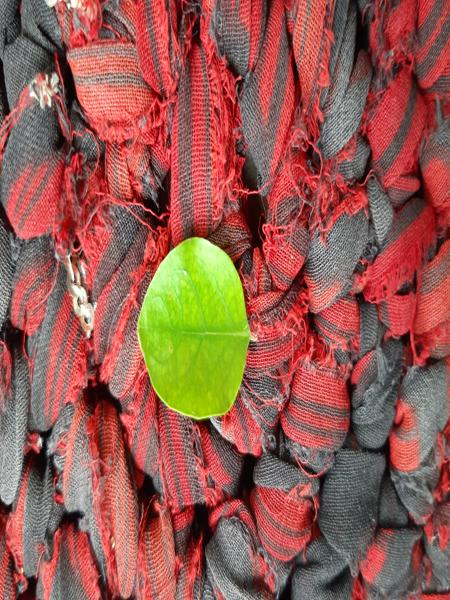

In [ ]:
from PIL import Image

image_path = "/content/drive/MyDrive/prompt/plant-rec/370.jpg"
image = Image.open(image_path)
image

In [ ]:
pipe(image)

[{'label': 'Lemon', 'score': 0.9804251790046692},
 {'label': 'Tulsi', 'score': 0.8343064785003662},
 {'label': 'Avacado', 'score': 0.7870473265647888},
 {'label': 'Bhrami', 'score': 0.6771162748336792},
 {'label': 'Palak(Spinach)', 'score': 0.6597365736961365}]

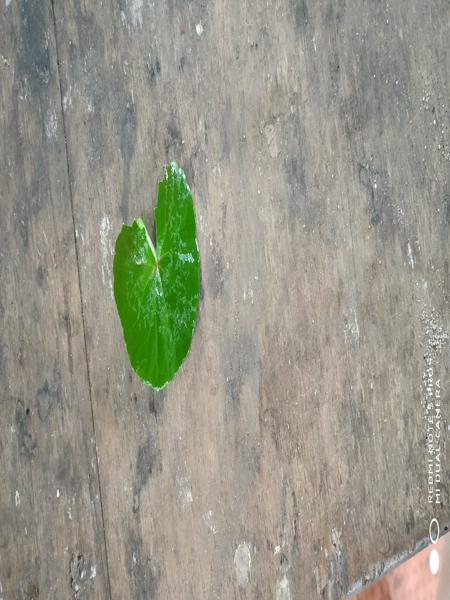

In [ ]:
image_path = "/content/drive/MyDrive/prompt/plant-rec/2214.jpg"
image = Image.open(image_path)
image

In [ ]:
pipe(image)

[{'label': 'Bhrami', 'score': 0.9929013848304749},
 {'label': 'Tulsi', 'score': 0.7585189938545227},
 {'label': 'Doddpathre', 'score': 0.6560954451560974},
 {'label': 'Amruta_Balli', 'score': 0.6120549440383911},
 {'label': 'Betel', 'score': 0.6100009083747864}]

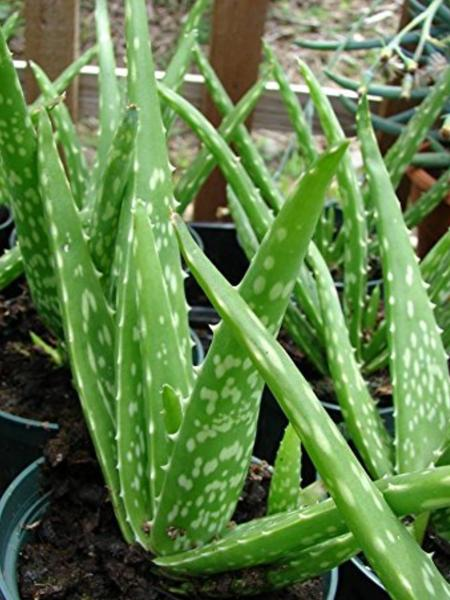

In [ ]:
image_path = "/content/drive/MyDrive/prompt/plant-rec/326alo.jpg"
image = Image.open(image_path)
image

In [ ]:
pipe(image)

[{'label': 'Aloevera', 'score': 0.9976874589920044},
 {'label': 'Bamboo', 'score': 0.7410199642181396},
 {'label': 'Pepper', 'score': 0.5476270318031311},
 {'label': 'Rose', 'score': 0.54180908203125},
 {'label': 'Tulasi', 'score': 0.5286810994148254}]

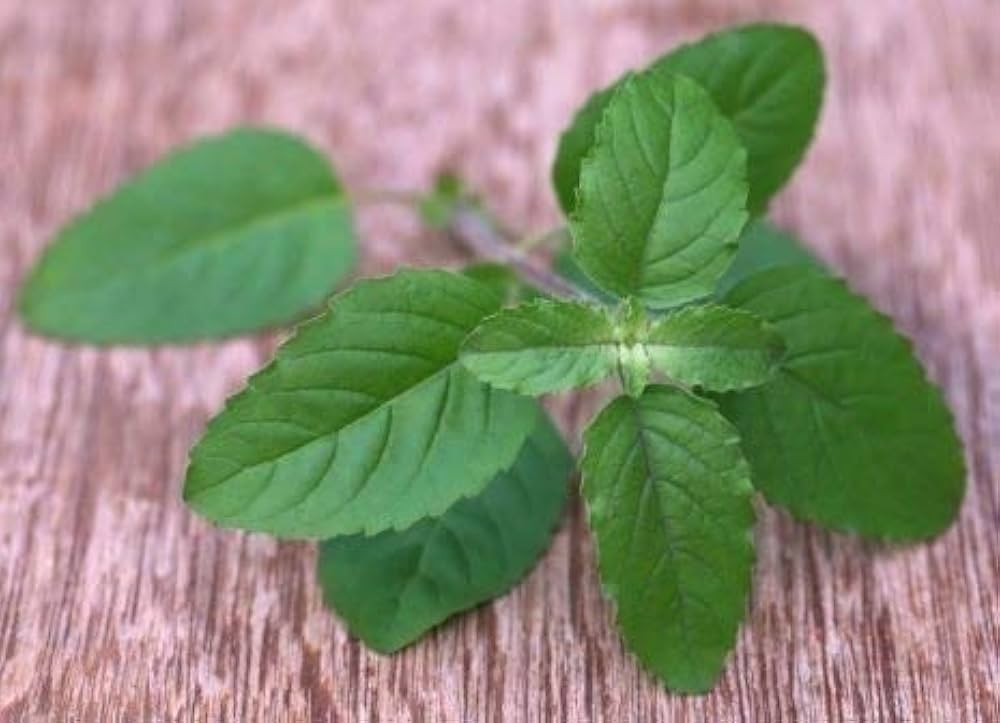

In [ ]:
image_path = "/content/drive/MyDrive/prompt/plant-rec/412KjXcaicL._AC_UF1000,1000_QL80_.jpg"
image = Image.open(image_path)
image

In [ ]:
pipe(image)

[{'label': 'Mint', 'score': 0.9420446753501892},
 {'label': 'Tulsi', 'score': 0.847191333770752},
 {'label': 'Betel', 'score': 0.8183543682098389},
 {'label': 'Amruta_Balli', 'score': 0.7569288015365601},
 {'label': 'Tulasi', 'score': 0.7498543858528137}]

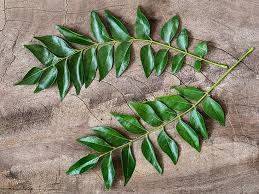

In [ ]:
image_path = "/content/drive/MyDrive/prompt/plant-rec/download.jpg"
image = Image.open(image_path)
image

In [ ]:
pipe(image)

[{'label': 'Curry', 'score': 0.9462984204292297},
 {'label': 'Neem', 'score': 0.9115903973579407},
 {'label': 'Tamarind', 'score': 0.7491503953933716},
 {'label': 'Papaya', 'score': 0.7428579926490784},
 {'label': 'Betel', 'score': 0.6423767805099487}]

In [ ]:
import pandas as pd

# List of Indian medicinal plants, their botanical names, and uses
plants_data = [
    {"Plant Name": "Neem", "Botanical Name": "Azadirachta indica", "Uses": "Antiseptic, antibacterial, skin disorders"},
    {"Plant Name": "Tulsi", "Botanical Name": "Ocimum sanctum", "Uses": "Common cold, flu, bronchitis, stress"},
    {"Plant Name": "Ashwagandha", "Botanical Name": "Withania somnifera", "Uses": "Stress relief, boost immunity, anxiety"},
    {"Plant Name": "Turmeric", "Botanical Name": "Curcuma longa", "Uses": "Anti-inflammatory, antioxidant, wound healing"},
    {"Plant Name": "Amla", "Botanical Name": "Phyllanthus emblica", "Uses": "Boost immunity, digestion, hair care"},
    {"Plant Name": "Aloe Vera", "Botanical Name": "Aloe barbadensis miller", "Uses": "Skin care, burns, digestion"},
    {"Plant Name": "Brahmi", "Botanical Name": "Bacopa monnieri", "Uses": "Memory enhancement, anxiety, mental health"},
    {"Plant Name": "Ginger", "Botanical Name": "Zingiber officinale", "Uses": "Digestive aid, nausea, anti-inflammatory"},
    {"Plant Name": "Peppermint", "Botanical Name": "Mentha piperita", "Uses": "Digestive issues, headaches, respiratory relief"},
    {"Plant Name": "Fenugreek", "Botanical Name": "Trigonella foenum-graecum", "Uses": "Lactation, diabetes, digestion"},
    {"Plant Name": "Sandalwood", "Botanical Name": "Santalum album", "Uses": "Skin care, aromatherapy, anti-inflammatory"},
    {"Plant Name": "Holy Basil", "Botanical Name": "Ocimum tenuiflorum", "Uses": "Respiratory disorders, fever, insect bites"},
    {"Plant Name": "Shatavari", "Botanical Name": "Asparagus racemosus", "Uses": "Female reproductive health, lactation, digestion"},
    {"Plant Name": "Moringa", "Botanical Name": "Moringa oleifera", "Uses": "Nutrient-rich, anti-inflammatory, diabetes"},
    {"Plant Name": "Jatamansi", "Botanical Name": "Nardostachys jatamansi", "Uses": "Stress relief, sleep aid, mental health"},
    {"Plant Name": "Bael", "Botanical Name": "Aegle marmelos", "Uses": "Digestive issues, diarrhea, respiratory health"},
    {"Plant Name": "Licorice", "Botanical Name": "Glycyrrhiza glabra", "Uses": "Sore throat, ulcers, respiratory health"},
    {"Plant Name": "Bitter Melon", "Botanical Name": "Momordica charantia", "Uses": "Diabetes, digestive health, immune booster"},
    {"Plant Name": "Hibiscus", "Botanical Name": "Hibiscus rosa-sinensis", "Uses": "Hair care, skin care, blood pressure management"},
    {"Plant Name": "Garlic", "Botanical Name": "Allium sativum", "Uses": "Cardiovascular health, immunity, digestion"},
    {"Plant Name": "Guggul", "Botanical Name": "Commiphora mukul", "Uses": "Cholesterol management, weight loss, arthritis"},
    {"Plant Name": "Gotu Kola", "Botanical Name": "Centella asiatica", "Uses": "Memory enhancement, wound healing, mental clarity"},
    {"Plant Name": "Safed Musli", "Botanical Name": "Chlorophytum borivilianum", "Uses": "Aphrodisiac, vitality, general health"},
    {"Plant Name": "Indian Gooseberry", "Botanical Name": "Emblica officinalis", "Uses": "Immunity boost, hair care, digestion"},
    {"Plant Name": "Sarpagandha", "Botanical Name": "Rauwolfia serpentina", "Uses": "Blood pressure, anxiety, sleep aid"},
    {"Plant Name": "Indian Lilac", "Botanical Name": "Melia azedarach", "Uses": "Skin care, insect repellent, antibacterial"},
    {"Plant Name": "Arjuna", "Botanical Name": "Terminalia arjuna", "Uses": "Cardiovascular health, blood pressure, cholesterol"},
    {"Plant Name": "Ajwain", "Botanical Name": "Trachyspermum ammi", "Uses": "Digestive aid, respiratory relief, antispasmodic"},
    {"Plant Name": "Triphala", "Botanical Name": "Emblica officinalis, Terminalia bellirica, Terminalia chebula", "Uses": "Digestive health, detoxification, immunity"},
    {"Plant Name": "Guduchi", "Botanical Name": "Tinospora cordifolia", "Uses": "Immunity boost, anti-inflammatory, detoxification"},
    {"Plant Name": "Henna", "Botanical Name": "Lawsonia inermis", "Uses": "Hair care, skin care, cooling effect"},
]

# Create a DataFrame
df_plants = pd.DataFrame(plants_data)

# Save to CSV file
csv_file_path = 'indian_medicinal_plants.csv'
df_plants.to_csv(csv_file_path, index=False)

csv_file_path


'indian_medicinal_plants.csv'